# **Exploratory Data Analysis with Python**

# * What is EDA ?
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

# * What is Python ?
Python is an interpreted,high-level,general purpose programming language.Created by Guido van Rossum and first released in 1991.

# **Topic : Exploratory Data Analysis of Car Features**

### *** Context** : Exploratory data analysis on how the different features of a car and its price are related. The data comes from the Kaggle dataset "Car Features and MSRP".It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features.

## *** Objective** : To do data pre-processing and exploratory data analysis of the dataset.

# **1a. Importing the dataset.**

In [152]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


# **1b. Importing the necessary Libraries**.

In [221]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# **1c. Loading the data into the data frame**.

In [154]:
#read df
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [155]:
#print first 10 lines of the dataset 
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [156]:
#print last 5 lines of the dataset
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# **1d. Checking datatype and statistical summary.**

In [157]:
# for the information of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# From the above, data is in integer format so we can plot the data via graph

In [158]:
#statistical summary of dataset
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [159]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [160]:
#size of dataset including rows and columns
df.shape

(11914, 16)

In [161]:
# null values in dataset
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# **2. Dropping less relevant columns.**

# Here we are removing some columns like Engine Fuel Type, Number of Doors, Market Category which are less relevant for the analysis.

In [162]:
df = df.drop(['Engine Fuel Type','Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# So after removing some columns we are checking columns, size and null values. 

In [163]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [164]:
df.shape

(11914, 13)

In [165]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

# **3.Renaming the columns.**

# Here we will rename the columns to improve the readability of the dataset.

In [166]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission","Driven_Wheels": "Drive Mode", "highway MPG":"MPG-H", "city mpg":"MPG-C", "MSRP":"Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [167]:
#checking the columns after renaming them.
df.columns

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Drive Mode', 'Vehicle Size', 'Vehicle Style', 'MPG-H', 'MPG-C',
       'Popularity', 'Price'],
      dtype='object')

# **4. Checking for any duplicates and null values and removing them.**

# Here we check for any duplicates, null values and we will remove them which helps to save the memory instead of wasting it for duplicates and null values.

In [168]:
# checking of null values in dataset before removing them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Drive Mode     11914 non-null  object 
 7   Vehicle Size   11914 non-null  object 
 8   Vehicle Style  11914 non-null  object 
 9   MPG-H          11914 non-null  int64  
 10  MPG-C          11914 non-null  int64  
 11  Popularity     11914 non-null  int64  
 12  Price          11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


In [169]:
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

In [170]:
#size of dataset before removing duplicates and null values.
df.shape

(11914, 13)

In [171]:
#Dropping the missing values.
df = df.dropna()
df.count()

Make             11816
Model            11816
Year             11816
HP               11816
Cylinders        11816
Transmission     11816
Drive Mode       11816
Vehicle Size     11816
Vehicle Style    11816
MPG-H            11816
MPG-C            11816
Popularity       11816
Price            11816
dtype: int64

In [172]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ",duplicate_rows_df.shape)

number of duplicate rows:  (792, 13)


In [173]:
# size of dataset after removing duplicates and null values.
df.drop_duplicates(keep=False,inplace=True)
df.shape

(10341, 13)

In [174]:
df  =df.drop_duplicates()
df.head(10)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10341 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10341 non-null  object 
 1   Model          10341 non-null  object 
 2   Year           10341 non-null  int64  
 3   HP             10341 non-null  float64
 4   Cylinders      10341 non-null  float64
 5   Transmission   10341 non-null  object 
 6   Drive Mode     10341 non-null  object 
 7   Vehicle Size   10341 non-null  object 
 8   Vehicle Style  10341 non-null  object 
 9   MPG-H          10341 non-null  int64  
 10  MPG-C          10341 non-null  int64  
 11  Popularity     10341 non-null  int64  
 12  Price          10341 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [176]:
#null values in dataset.
df.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

# **5a. Plot graphs of some columns in the dataset.**

# Here are the boxplot graphs of columns like Cylinders,Popularity,MPG-H,Price,Year  in the  dataset before removing outliers.

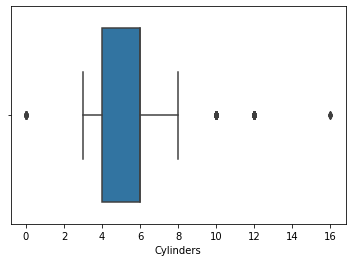

In [177]:
sns.boxplot(x=df['Cylinders'])

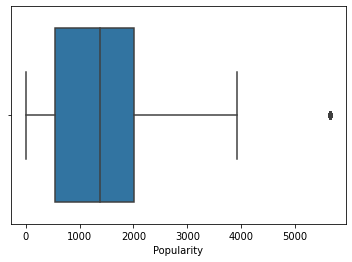

In [178]:
sns.boxplot(x=df['Popularity'])

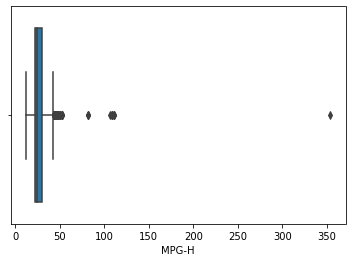

In [179]:
sns.boxplot(x=df['MPG-H'])

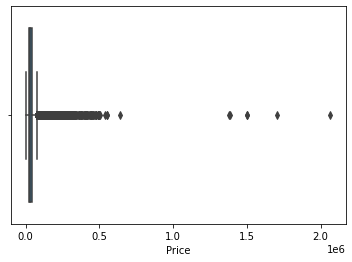

In [180]:
sns.boxplot(x=df['Price'])

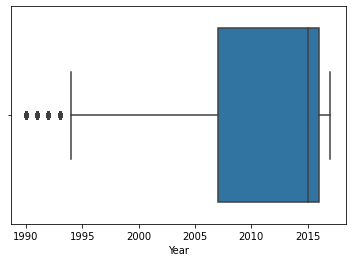

In [181]:
sns.boxplot(x=df['Year'])

# **5b. Checking outliers and removing them.**

# An outlier is a point or set of points that are different from other points. So we are detecting outliers and removing them for accurate model.

In [182]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21895.0
dtype: float64


In [183]:
df = df[~((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8074, 13)

In [184]:
#checking the number of outliers in boxplot of different columns after removing outliers.
((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))).sum()

Cylinders        0
Drive Mode       0
HP               0
MPG-C            0
MPG-H            0
Make             0
Model            0
Popularity       0
Price            0
Transmission     0
Vehicle Size     0
Vehicle Style    0
Year             0
dtype: int64

# **5c. Plot graphs of columns after removing outliers.**

# Here are the boxplot graphs of columns like Cylinders,Popularity,MPG-H,Price,Year in the dataset after removing the outliers.

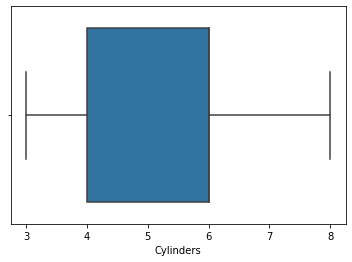

In [185]:
sns.boxplot(x=df['Cylinders'])

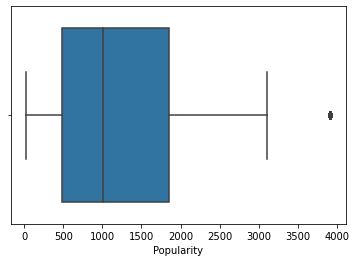

In [186]:
sns.boxplot(x=df['Popularity'])

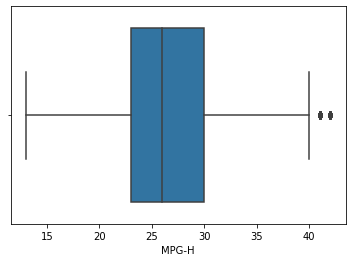

In [187]:
sns.boxplot(x=df['MPG-H'])

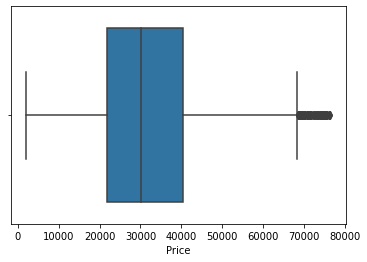

In [188]:
sns.boxplot(x=df['Price'])

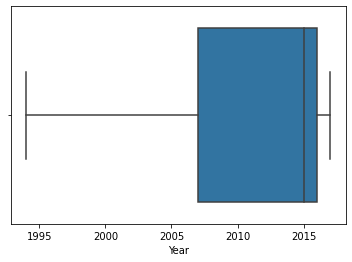

In [189]:
sns.boxplot(x=df['Year'])

# **6a. Displaying the most represented car brands in the dataset.**

# Here it gives the most represented top car brands based on their percentage in the dataset.

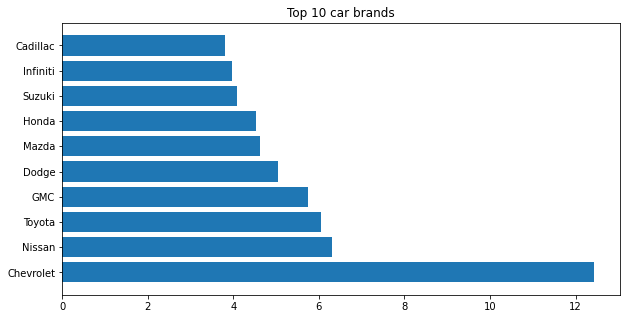

In [190]:
# count numbers of top 10 car brands in the dataset.
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Top 10 car brands
popular_labels = counts.index[:10]

#plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 car brands')
plt.show()

# **6b. Finding the average price among the top car brands.**

In [191]:
#Average price among 10 top car brands in the dataset.
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|(df['Make'] == 'Ford')|(df['Make'] == 'Volkswagen')|(df['Make'] == 'Toyata')|(df['Make'] == 'Dodge')|(df['Make'] == 'Nissan')|(df['Make'] == 'GMC')|(df['Make'] == 'Honda')|(df['Make'] == 'Mazda')].groupby('Make').mean()                                  
print(prices)

                   Price
Make                    
Chevrolet   28572.635095
Dodge       26178.358722
GMC         33666.516199
Honda       27246.472678
Mazda       20628.445040
Nissan      28559.636542
Volkswagen  30449.461017


# **7a. Plotting the correlation Matrix**

In [192]:
#correlation matrix.
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.321378,-0.106957,0.382672,0.340269,0.199974,0.580207
HP,0.321378,1.000000,0.732403,-0.439438,-0.547024,0.083655,0.753011
Cylinders,-0.106957,0.732403,1.000000,-0.677483,-0.736849,-0.000936,0.401774
MPG-H,0.382672,-0.439438,-0.677483,1.000000,0.935214,0.112745,-0.122202
MPG-C,0.340269,-0.547024,-0.736849,0.935214,1.000000,0.097936,-0.202485
Popularity,0.199974,0.083655,-0.000936,0.112745,0.097936,1.000000,0.111579
Price,0.580207,0.753011,0.401774,-0.122202,-0.202485,0.111579,1.000000


# **7b. Document your insights using heatmap plot**

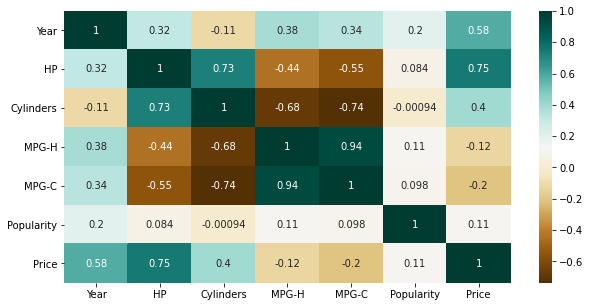

In [193]:
#plot of heatmap for different columns
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# After checking the heatmap plot we can conclude that:
# 1. Cylinders and HP are highly correlated with each other.
# 2. MPG-H and MPG-C are also highly correlated with each other.
# 3. Cylinders and MPG-H are highly anticorrelated with each other.
# 4. Popularity is not correlated with anything.
# 5. MPG-H and MPG-C are strongly negative correlated with Engine Cylinders because lower MPG-H and MPG-C means higher fuel consumption.

# **8a. Perform EDA and plotting  different graphs** 

# 1. Scatter plot graph of Price and MPG-H

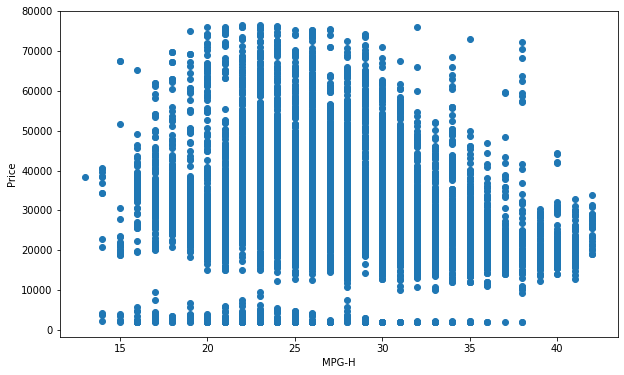

In [194]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MPG-H'], df['Price'])
ax.set_xlabel('MPG-H')
ax.set_ylabel('Price')
plt.show()

# 2. Scatter plot graph of Price and Cylinders.

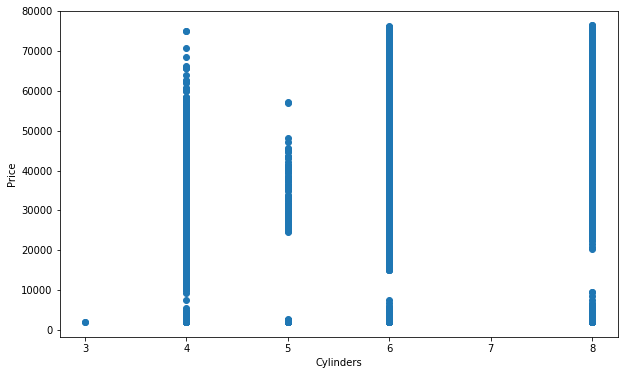

In [195]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Cylinders'], df['Price'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Price')
plt.show()

# 3. Scatter plot of Price and MPG-C

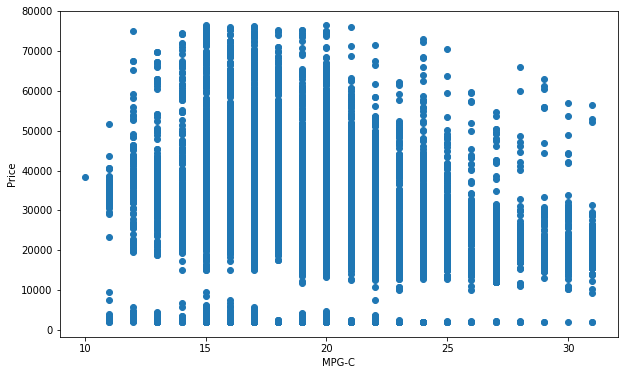

In [196]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MPG-C'], df['Price'])
ax.set_xlabel('MPG-C')
ax.set_ylabel('Price')
plt.show()

# 4. Scatter plot graph of Price and Year

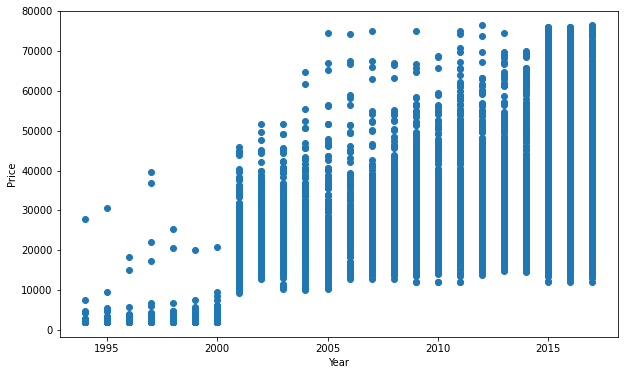

In [197]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Year'], df['Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

# 5. Scatter plot graph of Price and HP.

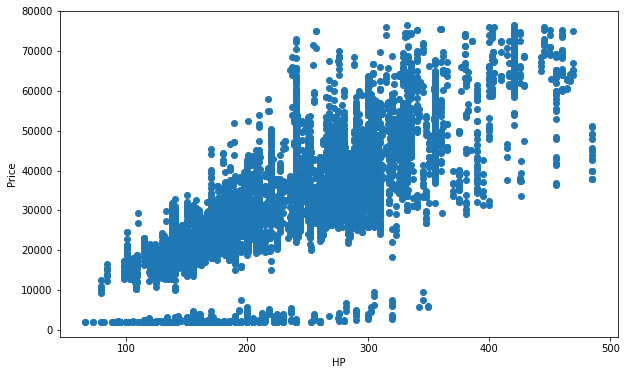

In [198]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

# 6. Scatter plot graph of Price and Popularity.

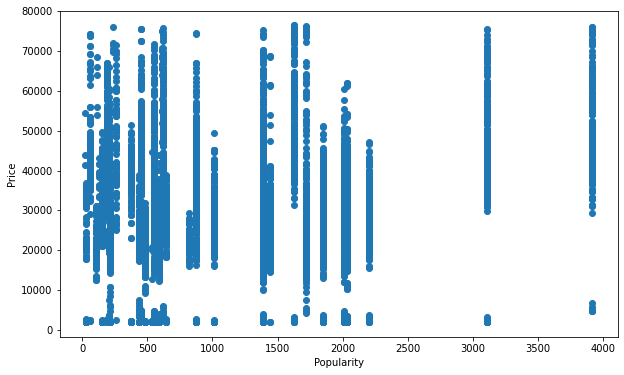

In [199]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Popularity'], df['Price'])
ax.set_xlabel('Popularity')
ax.set_ylabel('Price')
plt.show()

# **8b. Document of findings to see how other variables affecting the price.**

# After plotting different graphs we conclude that:
# 1. Prices decreases with increase in MPG-H.
# 2. Price increases with increase in Cylinders.
# 3. Price decreases with increase in MPG-c.
# 4. Price increases with increase in Year.
# 5. Price increases with increase in HP.
# 6. Price does not get effected by Popularity. 

# **9. Splitting the dataset into 80 and 20 ratio and building a machine learning model with price as the target variable.**

In [201]:
X = df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y = df['Price'].values

In [202]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [203]:
#Splitting the dataset into the training set and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [204]:
# Fitting multiple linear regression to the training set.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

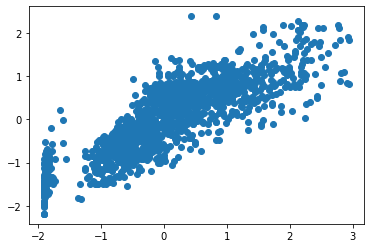

In [205]:
# predicting the test set results.
y_pred = regressor.predict(X_test)
plt.scatter( y_test, y_pred)

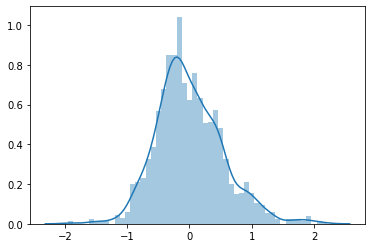

In [206]:
sns.distplot((y_test-y_pred),bins=50)

In [207]:
# Finding the values of MAE,RMSE and R-Square.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4179637681815545
Root Mean Squared Error: 0.5386328760856942
R2 Score: 0.6998934370608545


# **10.Spot checking different algorithms and their performance.**

# 1. Polynomial regression

In [208]:
#Input polynomial regression of the dataset.
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

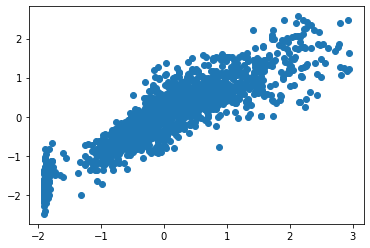

In [209]:
#Predicting a new result using polynomial regression.
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

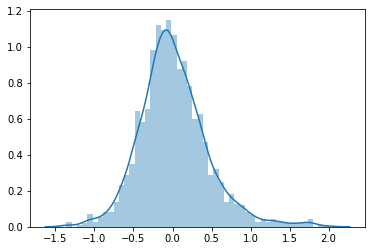

In [210]:
sns.distplot((y_test-y_pred),bins=50)

In [211]:
#Finding the value of MAE,RMSE and R-Square.
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.32786495818327505
Root Mean Squared Error: 0.44077798234624527
R2 Score: 0.7990307725368173


# 2. SVR

In [212]:
#Insert SVR to the dataset.
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

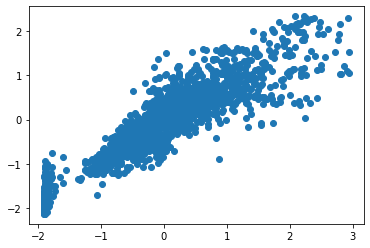

In [213]:
#Predicting new result using SVR.
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

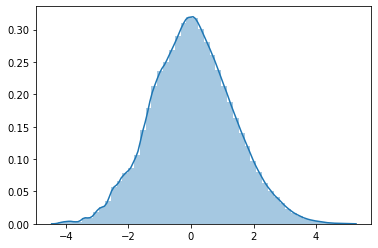

In [214]:
sns.distplot((y_test-y_pred),bins=50)

In [215]:
# Findind value of MAE,RMSE and R-Square using SVR.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31437108048049445
Root Mean Squared Error: 0.43947707933980174
R2 Score: 0.8002152947960609


# 3. Random Forest Regression

In [216]:
#Input Random forest regression to the dataset.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300,random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

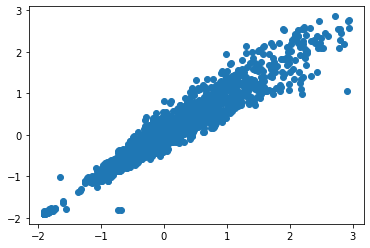

In [217]:
#predicting the result using Random forest regression.
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

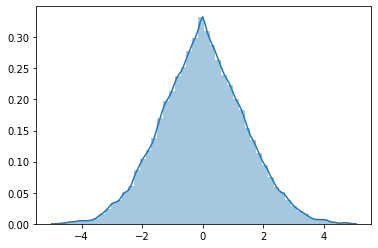

In [218]:
sns.distplot((y_test-y_pred),bins=50)

In [220]:
#finding the value of MAE, RMSE and R-Square using random forest regression.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.182873122375762
Root Mean Squared Error: 0.25334703030643957
R2 Score: 0.9336071344038788
